In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn as skl
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = (9, 5)

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import datetime
from dateutil.relativedelta import relativedelta
from arch import arch_model

p = print

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# зафиксируем выборку
np.random.seed(1)

In [3]:
# функция mean absolute persentage error
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

# ARIMA (1, 0, 0)
alpha = 0.5 , p = 1, d = 0, q = 0

процесс сводится к процессу AR, используем arma_generate

In [4]:
AR1 = {} # словарь для хранения данных модели
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [5]:
alphas = np.array([.5]) # p = 1
betas = np.array([0.]) # q = 0
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [6]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ar процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    # генерация процесса для n точек, где n равно i-му шагу
    ar1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ar1,order=(1,0)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении alpha
    cff_prd.append(mdl.params[0])
    
    # mape(np.ones(cnt)*0.5,cff_prd) - считает ошибку для n точек
    cff_mape.append(mape(0.5,mdl.params[0])) 
    print(n,', mape =', cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            #print()
            #print(cff_mape[cnt-1], min_mape, min_n, n)
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
    AR1[n] = ar1 
  
         

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 11.154904797036313
40 , mape = 14.317330182098797
50 , mape = 23.001220545362045
60 , mape = 13.171581380127362
70 , mape = 25.924568671079683
80 , mape = 14.659484763725283
90 , mape = 23.448399327716185
100 , mape = 0.266418865721052
110 , mape = 13.180889594754197
120 , mape = 2.1180856797903713
130 , mape = 6.573730697372415
140 , mape = 5.230099644756803
150 , mape = 17.874060448245398
160 , mape = 0.2881387238724997
170 , mape = 14.293140463661869
180 , mape = 15.167448571944252
190 , mape = 2.4054769071031434
200 , mape = 1.433373079915068
210 , mape = 9.254281410652599
220 , mape = 4.75332686542751
230 , mape = 19.06939169922781
240 , mape = 11.317213288833262
250 , mape = 10.089226305613352
260 , mape = 14.758204988327261
270 , mape = 1.4409487608430194
280 , mape = 3.665451811767495
290 , mape = 19.808082947245342
300 , mape = 1.7118954915641416
310 , mape = 18.105305948505634
320 , mape = 1.9372191225575874
330 , mape = 9.18359355870323
340 , mape = 8.03501473720

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


580 , mape = 5.3386537470797135
590 , mape = 7.251834345276265
600 , mape = 17.111462344534146
610 , mape = 5.808943721793147
620 , mape = 3.7122267499102968
630 , mape = 1.2256086643489317
640 , mape = 6.118788961509813
650 , mape = 13.450106179705635
660 , mape = 4.755208974425806
670 , mape = 6.805513497255511
680 , mape = 4.098033717343252
690 , mape = 9.023297782080508
700 , mape = 5.694098267223624
710 , mape = 4.357544460885854
720 , mape = 0.7576531898759065
730 , mape = 14.608472504698932
740 , mape = 9.104397159209555
750 , mape = 2.6811758554941667
760 , mape = 1.5075958517296595
770 , mape = 0.1284106212165681
780 , mape = 2.892333578872086
790 , mape = 1.8872608719952888
800 , mape = 14.00045007648103
810 , mape = 10.72611608357763
820 , mape = 3.531227378989943
830 , mape = 6.634380952082253
840 , mape = 0.5013460179606577
850 , mape = 2.940538500965162
860 , mape = 4.263125315297733
870 , mape = 6.524136096847277
880 , mape = 4.574631625627601
890 , mape = 12.50182997283

In [7]:
p()            
p('Min n={:1d}, при котором достигается mape alpha менее 5%'.format(min_n) )  


Min n=100, при котором достигается mape alpha менее 5%


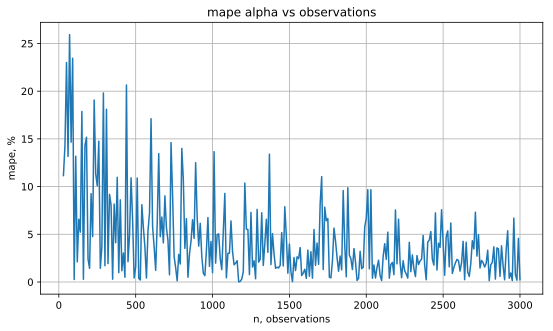

In [8]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha vs observations');

# ARIMA (0, 0, 1)
beta = 0.5 , p = 0, d = 0, q = 1

процесс сводится к процессу MA, используем arma_generate

In [9]:
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [10]:
alphas = np.array([0.]) # p = 0
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [11]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    
    # генерация процесса для n точек, где n равно i-му шагу
    ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ma1,order=(0,1)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении beta
    
    cff_prd.append(mdl.params[0])
     # mape(np.ones(cnt)*0.5,cff_prd) - считает ошибку для n точек
    cff_mape.append(mape(np.ones(cnt)*0.5,mdl.params[0])) 
    
    print(n,', mape =', cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
  


C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 34.29928979626439
40 , mape = 8.036229341817025
50 , mape = 0.940555706902757
60 , mape = 6.818611460997404
70 , mape = 35.785285525257926
80 , mape = 8.973448786206074
90 , mape = 14.66584276811307
100 , mape = 33.67507469720441
110 , mape = 9.487994795478915
120 , mape = 18.225072797484103
130 , mape = 14.937913892847643
140 , mape = 2.9459920609218537
150 , mape = 13.403465942328463
160 , mape = 3.3263617066735307
170 , mape = 5.538556450840959
180 , mape = 9.125968998244716
190 , mape = 17.332018896711542
200 , mape = 31.059995600008172
210 , mape = 9.78357595139351
220 , mape = 4.598618287010936
230 , mape = 4.768871137573704
240 , mape = 10.46169335656626
250 , mape = 7.012833397813956
260 , mape = 19.557848497752417
270 , mape = 7.892612194266868
280 , mape = 11.39284362913532
290 , mape = 8.057697993778836
300 , mape = 4.4160322246427866
310 , mape = 10.245702184837358
320 , mape = 26.255713895342492
330 , mape = 31.98888422238877
340 , mape = 11.728439504389886
350

2660 , mape = 1.7983731889701704
2670 , mape = 0.6674109929321714
2680 , mape = 5.65252406807184
2690 , mape = 1.0380090735107927
2700 , mape = 0.7437828422916515
2710 , mape = 0.24599742184302498
2720 , mape = 2.3580007783088774
2730 , mape = 2.4134337702409248
2740 , mape = 2.112007340302624
2750 , mape = 2.5989026044056063
2760 , mape = 1.7337022689592363
2770 , mape = 5.786390021149201
2780 , mape = 6.671116145922329
2790 , mape = 0.2680127963634371
2800 , mape = 4.591279190367214
2810 , mape = 1.2662429056719882
2820 , mape = 3.163053713228803
2830 , mape = 2.046214595561091
2840 , mape = 1.3366587132514596
2850 , mape = 5.159151322678346
2860 , mape = 5.062386036774291
2870 , mape = 0.6185545050815033
2880 , mape = 0.32958949931584103
2890 , mape = 1.799412818024404
2900 , mape = 1.7909656006619312
2910 , mape = 1.8943972455598646
2920 , mape = 0.25778248150718497
2930 , mape = 0.1663482276678785
2940 , mape = 0.8284334706007757
2950 , mape = 1.0865048082497664
2960 , mape = 2.41

In [12]:
p()            
p('Min n={:1d}, при котором достигается mape beta менее 5%'.format(min_n) ) 


Min n=50, при котором достигается mape beta менее 5%


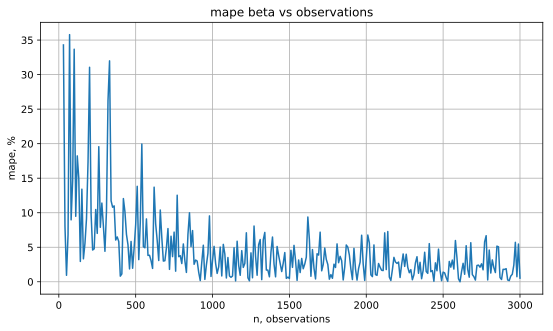

In [13]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape beta vs observations');

# ARIMA (1, 0, 1)

alpha = 0.5, beta = 0.5 , p = 1, d = 0, q = 1

In [14]:
cff_prd_a, cff_prd_b = [], [] # список для хранения коэффициентов n-ой модели
cff_mape_a, cff_mape_b, cff_mape_ab = [], [], [] # писок для хранения mape n-ого шага
min_mape, min_n_a, min_n_b, min_n_ab = 5.0, 0, 0,0 # в описании 0,05, но в задании mean absolute persantage (!)

In [15]:
alphas = np.array([0.5]) # p = 1
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [16]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    arma11 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(arma11,order=(1,1)).fit(maxlag=20, ic='aic', trend='nc')
    
    #считаем ошибку в определении alpha для n точек  
    cff_prd_a.append(mdl.params[0])
    cff_mape_a.append(mape(0.5, mdl.params[0])) 
    
    #считаем ошибку в определении beta для n точек
    cff_prd_b.append(mdl.params[1])
    cff_mape_b.append(mape(0.5, mdl.params[1])) 

    cff_mape_ab.append((cff_mape_a[cnt-1]+cff_mape_b[cnt-1])/2.0)
    print(n,', mape =', cff_mape_ab[cnt-1],'   mean=', np.mean(cff_mape_ab))

    
    if min_n_ab == 0:
        if cff_mape_ab[cnt-1] < min_mape:
            min_n_ab = n
        
    
    cnt+=1 # для увеличения размерности true матрицы alphas и betas

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 27.3815813498723    mean= 27.3815813498723
40 , mape = 25.791323932726065    mean= 26.586452641299182
50 , mape = 16.228584878988872    mean= 23.13383005386241
60 , mape = 15.637370362285823    mean= 21.259715130968264
70 , mape = 43.24359320237467    mean= 25.656490745249545
80 , mape = 23.40442559524101    mean= 25.281146553581454
90 , mape = 8.375996800496598    mean= 22.86612516028362
100 , mape = 2.4550503732375772    mean= 20.314740811902865
110 , mape = 28.360535702133397    mean= 21.20871802192848
120 , mape = 18.62869476462213    mean= 20.950715696197847
130 , mape = 28.66201316089915    mean= 21.65174273844342
140 , mape = 6.380153686849144    mean= 20.37911031747723
150 , mape = 9.25790058150992    mean= 19.523632645479747
160 , mape = 33.38130878632297    mean= 20.51346665553998
170 , mape = 5.828868044848989    mean= 19.534493414827246
180 , mape = 6.754547786836861    mean= 18.735746813077842
190 , mape = 8.1247987489042    mean= 18.111573397538216
200 , mape 

1420 , mape = 6.7992088174705305    mean= 8.501791971429137
1430 , mape = 1.774397694545754    mean= 8.454079955281028
1440 , mape = 4.30304196126473    mean= 8.424847293351336
1450 , mape = 3.2950789302075623    mean= 8.388974787315366
1460 , mape = 4.295578536053302    mean= 8.36054842445938
1470 , mape = 11.291243162836047    mean= 8.380760112310254
1480 , mape = 2.5785741692655018    mean= 8.341019112700357
1490 , mape = 2.2252779288113422    mean= 8.299415431177303
1500 , mape = 4.006949930033904    mean= 8.270412285899308
1510 , mape = 3.4172832550412644    mean= 8.237840950121736
1520 , mape = 7.301354526378468    mean= 8.231597707296782
1530 , mape = 1.9065732382990308    mean= 8.189710128031894
1540 , mape = 7.824462043442603    mean= 8.187307180106966
1550 , mape = 7.932175648122076    mean= 8.185639653754123
1560 , mape = 3.74008590229527    mean= 8.156772421601794
1570 , mape = 1.5304660625314825    mean= 8.114022057994887
1580 , mape = 4.237713852574842    mean= 8.08917392

2810 , mape = 4.599530144872071    mean= 6.165084218904725
2820 , mape = 3.1995654736473536    mean= 6.154493080528806
2830 , mape = 3.109020090092096    mean= 6.143655098356433
2840 , mape = 1.6588708880299674    mean= 6.127751608248893
2850 , mape = 3.703512601490461    mean= 6.119185392677308
2860 , mape = 2.921534109391411    mean= 6.10792605717278
2870 , mape = 4.765409456175323    mean= 6.103215472607877
2880 , mape = 3.0190584205267434    mean= 6.092431706691509
2890 , mape = 5.695915872148688    mean= 6.091050118417841
2900 , mape = 1.7958385755767026    mean= 6.076136189449643
2910 , mape = 1.6833565533876105    mean= 6.060936259913096
2920 , mape = 0.6051403658296373    mean= 6.042123170623153
2930 , mape = 2.515893780531359    mean= 6.030005543853078
2940 , mape = 0.9876605614695166    mean= 6.012737239118888
2950 , mape = 3.201264062914361    mean= 6.003141767527746
2960 , mape = 3.629276965124073    mean= 5.9950673974515425
2970 , mape = 1.9430527044641988    mean= 5.98133

In [17]:
p()
#print('Min n {:1d} aplpha, min n {:1d} beta'.format(min_n_a, min_n_b))
p('Min n={:1d}, при котором достигается mape alpha и beta менее 5%'.format(min_n_ab) ) 


Min n=100, при котором достигается mape alpha и beta менее 5%


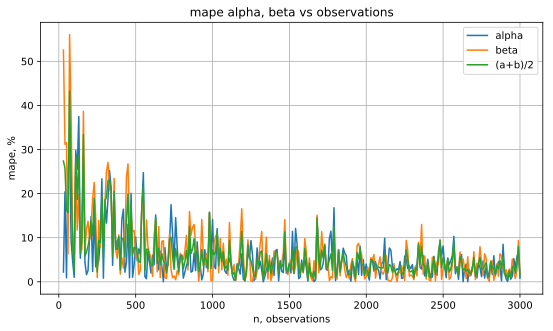

In [18]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape_a, label = 'alpha')
plt.plot(np.array(range(30, 3001, 10)),cff_mape_b, label = 'beta')
plt.plot(np.array(range(30, 3001, 10)),cff_mape_ab, label = '(a+b)/2' )
plt.legend(loc='upper right')
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha, beta vs observations')
plt.show()

Для mape, при которой достигается оценки точности коэффициэнтов, обычно достаточно больше 100 наблюдений

Может быть, потом стоит брать среднее по вектору коэффициентов? Как выводится на печать mean в последнем примере.

Вцелом я до сих пор сомневаюсь, как лучше оценить N
для лучшего качества оценки коэффициентов.